# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

This project needs to [UnityEnviroment](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) (Verison; 0.4)

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [1]:
from unityagents import UnityEnvironment
import numpy as np

# for mac
#env = UnityEnvironment(file_name="Banana.app")

# for linux
env = UnityEnvironment(file_name="Banana_Linux_NoVis/Banana.x86_64")

# for windows
#env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [4]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [5]:
# import my implementation (agent & model) and helper functions
from scores import *

from dqn_agent import *
from model import *

# Environement reset
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

cpu
Number of agents: 1
Number of actions: 4
States look like: [0.         0.         1.         0.         0.16101955 1.
 0.         0.         0.         0.04571758 1.         0.
 0.         0.         0.2937662  0.         0.         1.
 0.         0.14386636 0.         0.         1.         0.
 0.16776823 1.         0.         0.         0.         0.04420976
 1.         0.         0.         0.         0.05423063 0.
 0.        ]
States have length: 37


In [6]:
# function to run single episode & Train function

def runOnce(env, agent, eps ):
    score = 0
    env_info = env.reset(train_mode=True)[brain_name]
    state = env_info.vector_observations[0]
    done = False
    while not done:
        action = agent.act(state, eps )
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations[0]
        reward = env_info.rewards[0]
        done = env_info.local_done[0]
        agent.step(state, action, reward, next_state, done)
        score += reward
        state = next_state
    return score

def TrainAgent( env, agent, expect, prefix,  episodes=2000, window_size=100, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    scores = Scores(expect, window_size)
    success = False
    eps = eps_start
    for i_episode in range(1, episodes+1):
        score = runOnce(env, agent, eps )
        eps = max(eps_end, eps_decay*eps)
        if scores.AddScore(score) == True:
            agent.Save('model.pt')
            success = True
            break

    scores.FlushLog(prefix, True)
    return success

In [7]:
# Hyperparameters
params = {
    'buffer_size': int(1e5),    # replay buffer size
    'batch_size': 64,           # minibatch size
    'gamma': 0.95,              # discount factor
    'tau': 1e-3,                # for soft update of target parameters
    'LR': 5e-4,                 # learning rate 
    'update_interval': 4,       # how often to update the network
    'hidden_layer': (128, 128)  # hidden layer info
}



[2021-02-07 23:34:34.278471] Episode 100	Average Score: 0.67
[2021-02-07 23:35:39.660404] Episode 200	Average Score: 3.96
[2021-02-07 23:36:46.036983] Episode 300	Average Score: 7.45
[2021-02-07 23:37:53.004921] Episode 400	Average Score: 10.07
[2021-02-07 23:38:59.896188] Episode 500	Average Score: 12.51
[2021-02-07 23:39:13.859106] Episode 521	Average Score: 13.03
[2021-02-07 23:39:13.859209] Environment solved in 421 episodes!	Average Score: 13.03

Min: -3.0
Max: 22.0
Count: 521
Avg: 7.214971209213052
Std: 5.410575275073115
Done




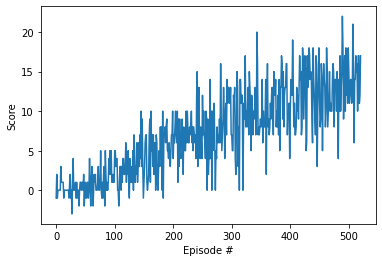

True

In [8]:
# Train it!
agent = Agent(state_size=state_size, action_size=action_size, seed=0, params = params ) 

TrainAgent(env, agent, 13, 'banana13')

[2021-02-07 23:40:18.982581] Episode 100	Average Score: 0.16
[2021-02-07 23:41:23.156318] Episode 200	Average Score: 3.35
[2021-02-07 23:42:28.478919] Episode 300	Average Score: 6.85
[2021-02-07 23:43:34.245954] Episode 400	Average Score: 9.80
[2021-02-07 23:44:43.392616] Episode 500	Average Score: 11.90
[2021-02-07 23:45:47.597692] Episode 600	Average Score: 13.78
[2021-02-07 23:46:51.788139] Episode 700	Average Score: 13.88
[2021-02-07 23:47:55.882715] Episode 800	Average Score: 13.71
[2021-02-07 23:49:00.020482] Episode 900	Average Score: 13.68
[2021-02-07 23:50:04.229989] Episode 1000	Average Score: 14.12
[2021-02-07 23:51:08.251095] Episode 1100	Average Score: 14.13
[2021-02-07 23:52:12.591113] Episode 1200	Average Score: 14.77
[2021-02-07 23:52:26.278708] Episode 1220	Average Score: 15.00
[2021-02-07 23:52:26.278812] Environment solved in 1120 episodes!	Average Score: 15.00

Min: -4.0
Max: 28.0
Count: 1220
Avg: 10.931967213114755
Std: 6.1085369769630615
Done




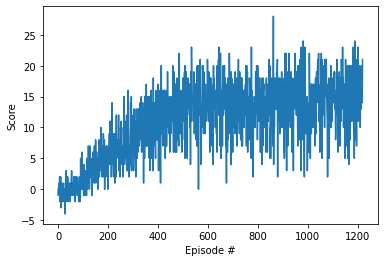

True

In [9]:
# Train for more score


agent = Agent(state_size=state_size, action_size=action_size, seed=0, params = params ) 

TrainAgent(env, agent, 15, 'banana_15')

[2021-02-08 00:41:42.180582] Episode 5	Average Score: 16.80
Min: 3.0
Max: 23.0
Count: 99
Avg: 15.363636363636363
Std: 4.038838080374821
Done




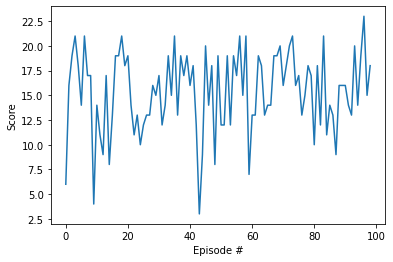

In [10]:
## Test runs

def runTestOnce(env, agent):
    score = 0
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations[0]
    done = False
    while not done:
        action = agent.act(state, 0 )
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations[0]
        reward = env_info.rewards[0]
        done = env_info.local_done[0]
        agent.step(state, action, reward, next_state, done)
        score += reward
        state = next_state
    return score

agent.Load('model.pt')
scores = Scores(13, 10, False)
for i_episode in range(1, 100):
    score = runTestOnce(env, agent)
    scores.AddScore(score)

scores.FlushLog('test', True)
